# Assignment 1 (Statistics and Trends)
##  Applied Data Science 1
### Module Leader: Dr. William Cooper

### Importing Important Libraries 

In [41]:
# Importing Important Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

### Reading the Data File with Pandas 

In [42]:
# Data Preparation and read the csv file into a DataFrame
df = pd.read_csv("Housing.csv")

In [43]:
# Printing the head to show dataframe columns
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [44]:
# Understanding the data using describe 
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Cleaning Data 

In [45]:
# Remove the empty entiries
df = df.dropna()

In [46]:
# Check the change if any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Statistical Treatment on Data 

In [47]:
df.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [48]:
# Statistics on DataFrame
# Mean, Median, Standard Deviation etc
def major_statistics():

    # mean and median:
    mean_value = df.mean(numeric_only=True)
    median_value = df.median(numeric_only=True)

    # standard deviation
    std_deviation = df.std(numeric_only=True)
    
    skewness = df.skew(numeric_only=True)
    kurtosis = df.kurt(numeric_only=True)

    print("\033[1mMean:\n\033[0m", mean_value)
    print("\n\033[1mMedian:\n\033[0m", median_value)
    print("\n\033[1mStandard Deviation:\n\033[0m", std_deviation)
    print("\n\033[1mSkewness:\n\033[0m", skewness)
    print("\n\033[1mKurtosis:\n\033[0m", kurtosis)
    return

In [49]:
major_statistics()

Mean:
 price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

Median:
 price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

Standard Deviation:
 price        1.870440e+06
area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
parking      8.615858e-01
dtype: float64

Skewness:
 price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

Kurtosis:
 price        1.960130
area         2.751480
bedrooms     0.728323
bathrooms    2.164856
stories      0.679404
parking     -0.573063
dtype: float64


## Plotting the Graphs

### 1- Plot of Pie Chart

In [50]:
def plot_pie_chart(df):
    """
    Creates a pie chart for multi-storey houses
    """
    # Extracting unique categories and their counts
    category = df.iloc[:, 4].unique()

    # Count occurrences of each category
    category_count = df.iloc[:, 4].value_counts()
    labels = category
    sizes = [category_count[cat] for cat in category]
    
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title('Distribution of Houses Storey-wise')
    plt.savefig('pie_chart.png', dpi=600)
    plt.show()
    return

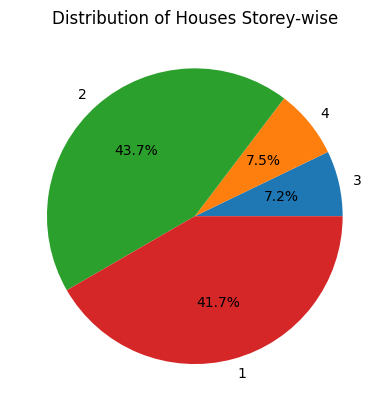

In [51]:
plot_pie_chart(df)

### 2- Plot of Histogram

In [52]:
# Histogram graph 
def price_distribution_plot(df):
    """
    Function to create a Histogram for finding frequency of houses prices
    """
    plt.figure(figsize=(10, 6))

    sns.histplot(df['price'], bins=30, kde=True, color='green', edgecolor='black')

    plt.title('Distribution of House Prices', fontsize=16)
    plt.xlabel('Price', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Save the plot as an image
    plt.savefig('PriceDistributionPlot.png', dpi=600)
    plt.show()
    return

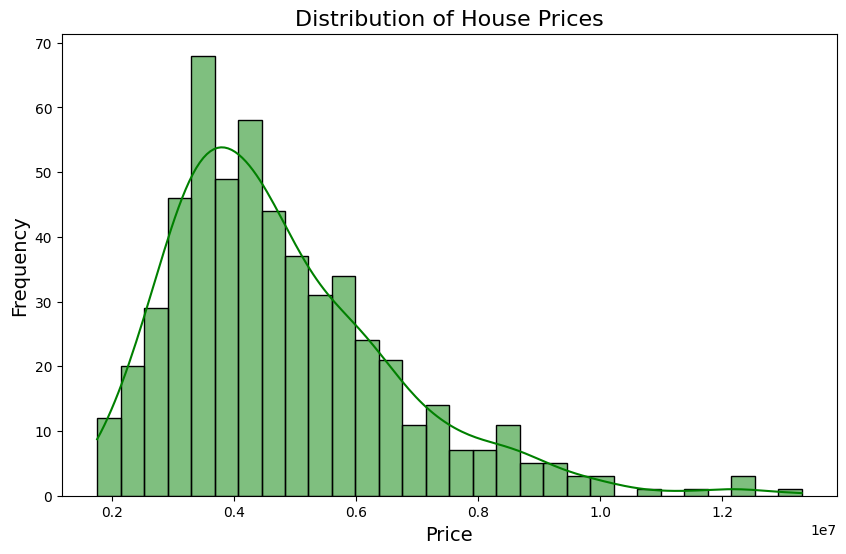

In [53]:
price_distribution_plot(df)

## 3- Scatter Plot

In [54]:
# Function for plotting scatter graph
def plot_scatterplot(df):
    """
    Create a scatter plot for prices of house against area in square feet
    """
    # Creating scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='area', y='price', data=df, hue='bedrooms', size='bathrooms', palette='viridis', sizes=(20, 200))
    
    plt.title('Scatter Plot of House Prices vs. Area')

    # formatting
    plt.xlabel('Area (sq. feet)', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.legend(title='Bedrooms')
    plt.savefig('ScatterPlot.png', dpi=600)
    plt.show()
    return

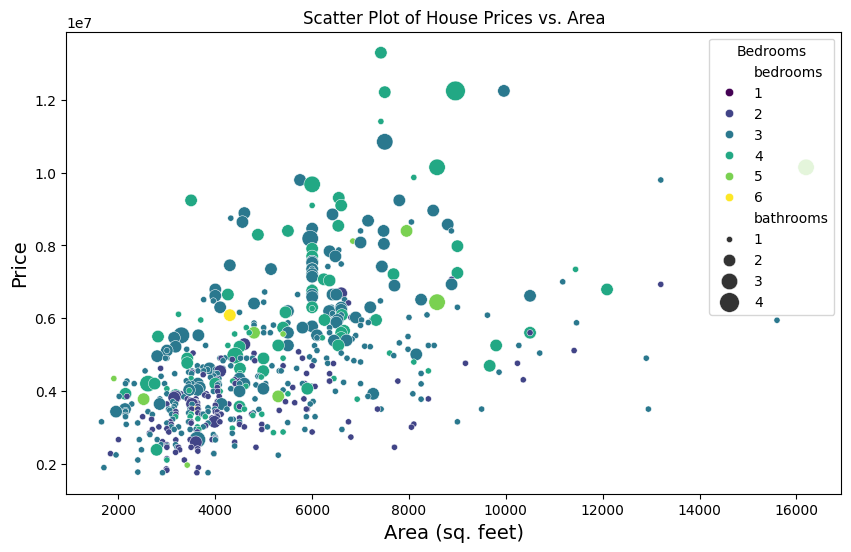

In [55]:
plot_scatterplot(df)

## 4- Box Plot

In [56]:
# Function for the box plot 
def plot_boxplot(feature1, feature2):
    """
    Create a box plot for estimation of prices versus number of bedrooms
    """
    plt.figure(figsize=(10, 6))
    
    sns.boxplot(x=feature1, y=feature2, data=df, hue=feature1, palette='Set2', legend=False)

    plt.xlabel("Number of Bedrooms", fontsize=14)
    plt.ylabel("House Price", fontsize=14)
    plt.title("Number of Bedrooms vs House Price")
    plt.savefig('boxplot.png', dpi=600)
    plt.show()
    return

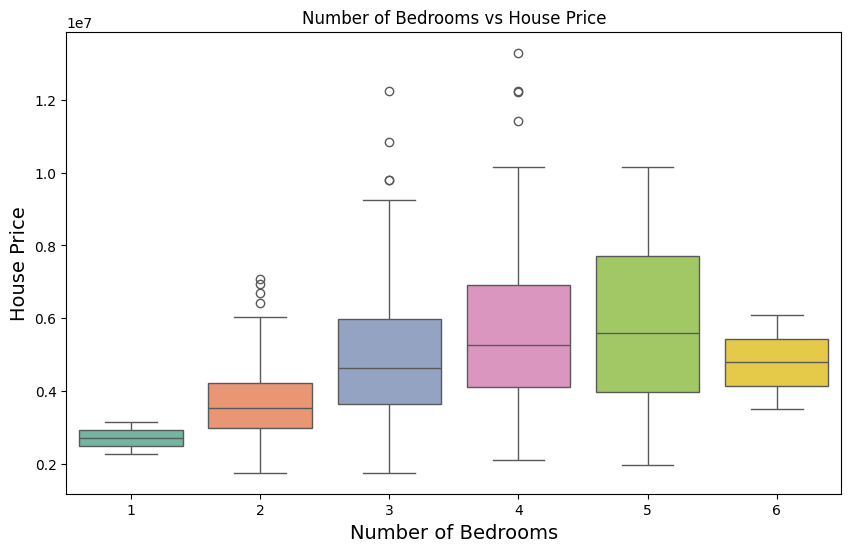

In [57]:
plot_boxplot("bedrooms", "price")

## 5- Heat Map from Correation Matrix

In [58]:
# Function For plotting a Heatmap from Correlation Matrix
def plot_heatmap(df):
    """
    Create a heat map correlation matrix 
    """
    plt.figure(figsize=(10, 6))

    # Create correlation matrix
    correlation_matrix = df.corr(numeric_only=True)

    # Plot heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
    # Add title
    plt.title('Correlation Heatmap')

    # Save plot as a PNG image
    plt.savefig('heatmap.png', dpi=600)

    # Display the plot
    plt.show()
    return  

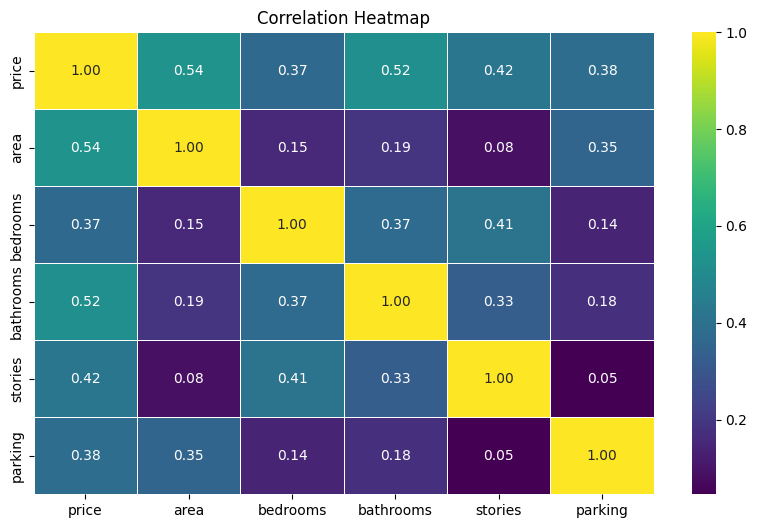

In [59]:
plot_heatmap(df)